# Insta Insights: A Data-Driven Approach to Influencer Engagement Prediction

## Project Overview:

This project aims to predict the engagement rate of Instagram influencers based on various features such as followers, posts, average likes, and country. The engagement rate is a crucial metric for brands to identify the right influencers for marketing campaigns. By building a predictive model, we can help businesses make data-driven decisions when selecting influencers.

## Tools Used:

Python Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

Machine Learning Models: Linear Regression, Random Forest Regressor, Random Forest Classifier

Data Visualization: Matplotlib, Seaborn

## Dataset Overview:

The dataset contains information about the top Instagram influencers, including their rank, channel info, influence score, number of posts, followers, average likes, 60-day engagement rate, new post average likes, total likes, and country.

### Step 1: Data Loading and Preprocessing

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

#### Loading the Dataset:

We start by loading the dataset using Pandas.

In [510]:
# Load the dataset
df = pd.read_csv('top_insta_influencers_data.csv')
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [512]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [514]:
df.dtypes

rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

In [516]:
df.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

#### Data Cleaning:

- Handle missing values by filling numerical columns with the median and categorical columns with the mode.
- Convert columns like followers, posts, and total_likes to appropriate data types (e.g., integers).

In [519]:
# Function to clean and convert values to numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '').lower()
        multiplier = 1
        if 'k' in value:
            multiplier = 1_000
            value = value.replace('k', '')
        elif 'm' in value:
            multiplier = 1_000_000
            value = value.replace('m', '')
        value = ''.join(c for c in value if c.isdigit() or c == '.')
        return float(value) * multiplier if value else np.nan
    return value

# List of columns to convert
convert_columns = ['followers', 'posts', 'avg_likes', 'total_likes', 'new_post_avg_like', '60_day_eng_rate']

# Apply the function to each column
for col in convert_columns:
    df[col] = df[col].apply(convert_to_numeric)

df.head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,29.0,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,57.4,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.0,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,11.5,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,12.5,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,19.9,United States
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,18.4,United States
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.4,United States
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9.8,United States
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,13.9,Canada


In [521]:
# Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(subset=['influence_score', '60_day_eng_rate'], inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,29.0,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,57.4,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.0,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,11.5,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,12.5,United States


### Step 2: Feature Engineering

We create new features such as engagement ratio and growth rate to better understand the data.

In [524]:
# Feature Engineering
df['engagement_ratio'] = (df['avg_likes'] / df['followers']) * 100 
df['growth_rate'] = df['new_post_avg_like'] / df['avg_likes']

# Ensure bins are strictly increasing
df['60_day_eng_rate'] = df['60_day_eng_rate'].astype(str).apply(convert_to_numeric)
max_eng_rate = df['60_day_eng_rate'].max()
if max_eng_rate <= 3:
    max_eng_rate = 4 

df['engagement_category'] = pd.qcut(df['60_day_eng_rate'], q=[0, 0.25, 0.75, 1], labels=['Low', 'Medium', 'High'])

le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

### Step 3: Data Visualization

We visualize the data to gain insights into the distribution of influence scores, followers vs engagement ratio, and the top countries with the most influencers.

#### Distribution of Influence Score

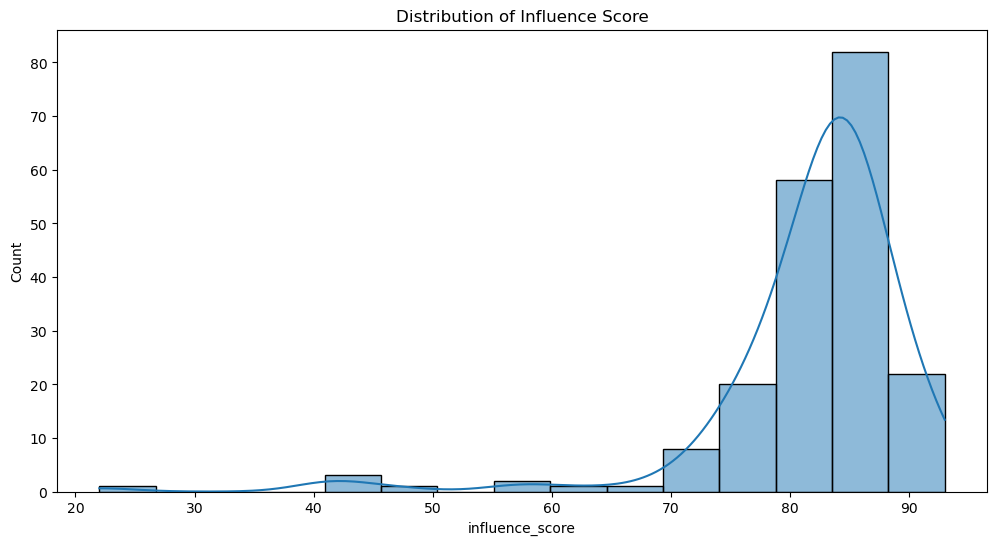

In [528]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['influence_score'], kde=True, bins=15)
plt.title("Distribution of Influence Score")
plt.show()

#### Engagement Category vs Followers

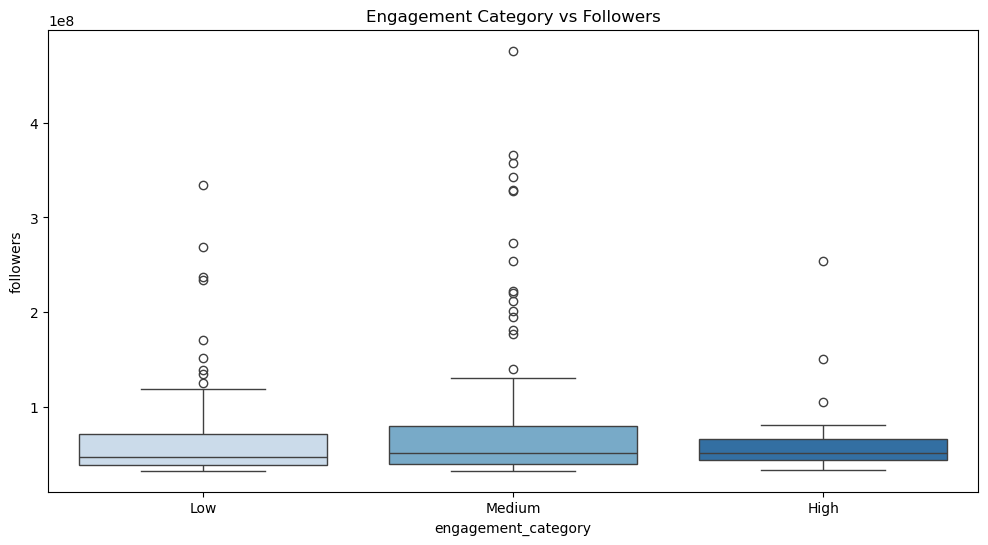

Followers vs Influence Score Correlation:
                  followers  influence_score
followers         1.000000         0.368377
influence_score   0.368377         1.000000


In [531]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['engagement_category'], y=df['followers'], hue= df['engagement_category'], palette='Blues')
plt.title("Engagement Category vs Followers")
plt.show()

# Correlation check
correlation = df[['followers', 'influence_score']].corr()
print("Followers vs Influence Score Correlation:\n", correlation)

#### Followers vs Engagement Ratio by Country

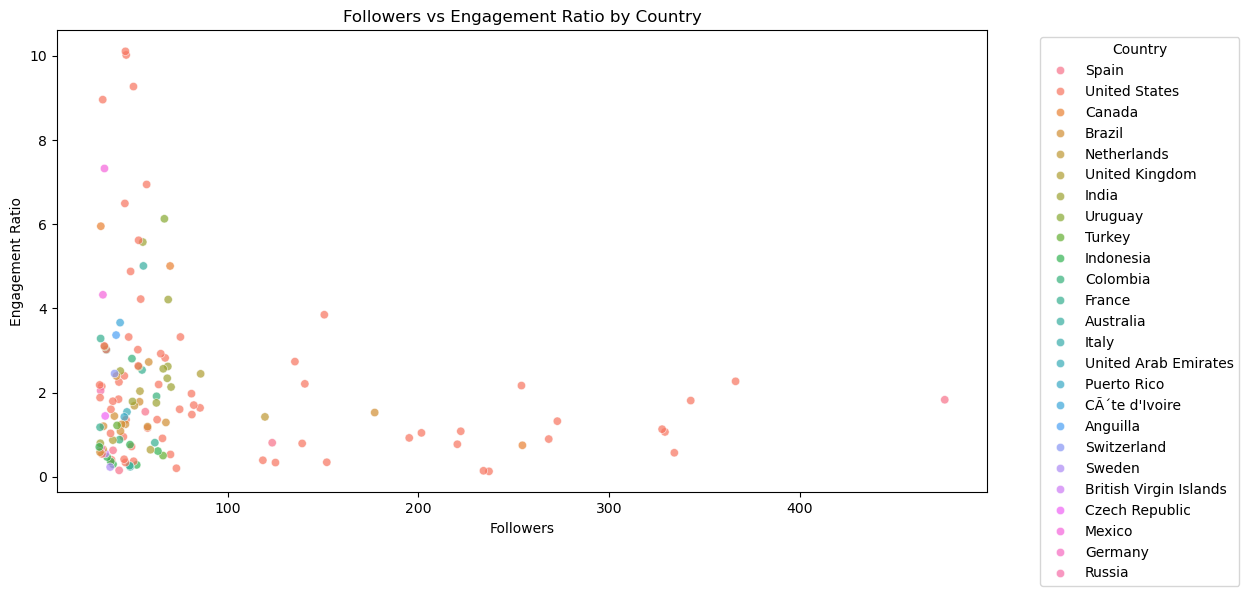

In [534]:
plt.figure(figsize=(12, 6))
clean_df = df.dropna(subset=['followers', 'engagement_ratio'])
sns.scatterplot(x=df['followers']/ 1e6, y=df['engagement_ratio'], hue=df['country'], alpha=0.7)
plt.title("Followers vs Engagement Ratio by Country")
plt.xlabel("Followers")
plt.ylabel("Engagement Ratio")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Top 10 Countries with Most Influencers

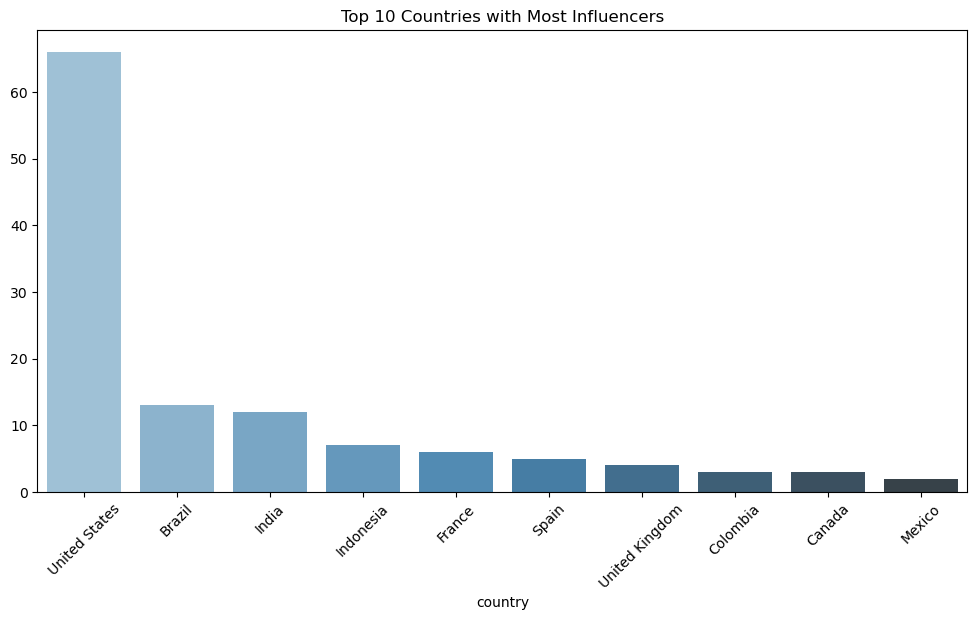

In [537]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['country'].value_counts().index[:10], y=df['country'].value_counts().values[:10], palette='Blues_d', hue= df['country'].value_counts().index[:10])
plt.title("Top 10 Countries with Most Influencers")
plt.xticks(rotation=45)
plt.show()

#### Top 10 Countries by Engagement Ratio

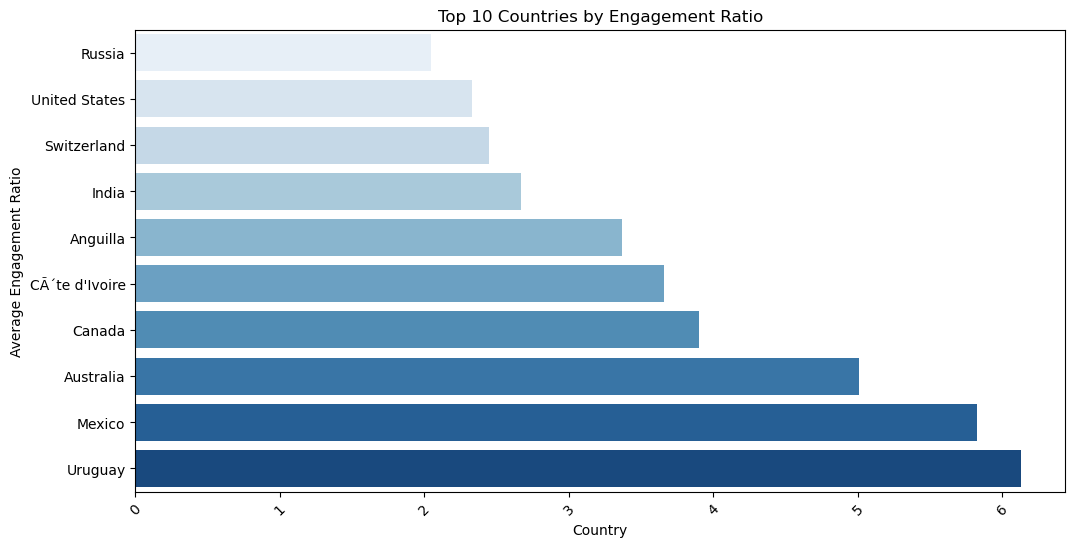

In [540]:
top_countries = df.groupby('country')['engagement_ratio'].mean().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue= top_countries.index, palette="Blues")
plt.title("Top 10 Countries by Engagement Ratio")
plt.xlabel("Country")
plt.ylabel("Average Engagement Ratio")
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.show()

### Step 4: Machine Learning Model for Influence Score Prediction

We use a Random Forest Regressor to predict the influence score based on features like followers, average likes, and engagement rate.

In [543]:
# Machine Learning Model for Influence Score Prediction
X = df[['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']]
y = df['influence_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 128.22593
R^2 Score: -0.0173633244074185


### Step 5: Classification Model for Engagement Rate

We use a Random Forest Classifier to classify the engagement rate into categories like Low, Medium, and High.

In [569]:
# Classification Model for Engagement Rate
X_clf = df[['followers', 'influence_score', 'country_encoded', 'engagement_ratio']].copy()
y_clf = df['engagement_category'].copy()

# Fill missing values
X_clf.fillna(X_clf.median(), inplace=True)
y_clf.fillna(y_clf.mode()[0], inplace=True)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
classifier.fit(X_train_clf, y_train_clf)
y_pred_clf = classifier.predict(X_test_clf)

print(f'Accuracy: {accuracy_score(y_test_clf, y_pred_clf)}')
print(classification_report(y_test_clf, y_pred_clf))

Accuracy: 0.85
              precision    recall  f1-score   support

        High       0.92      1.00      0.96        11
         Low       0.60      0.86      0.71         7
      Medium       0.94      0.77      0.85        22

    accuracy                           0.85        40
   macro avg       0.82      0.88      0.84        40
weighted avg       0.88      0.85      0.85        40



### Step 6: Clustering Influencers

We use KMeans clustering to group influencers based on their followers and average likes.

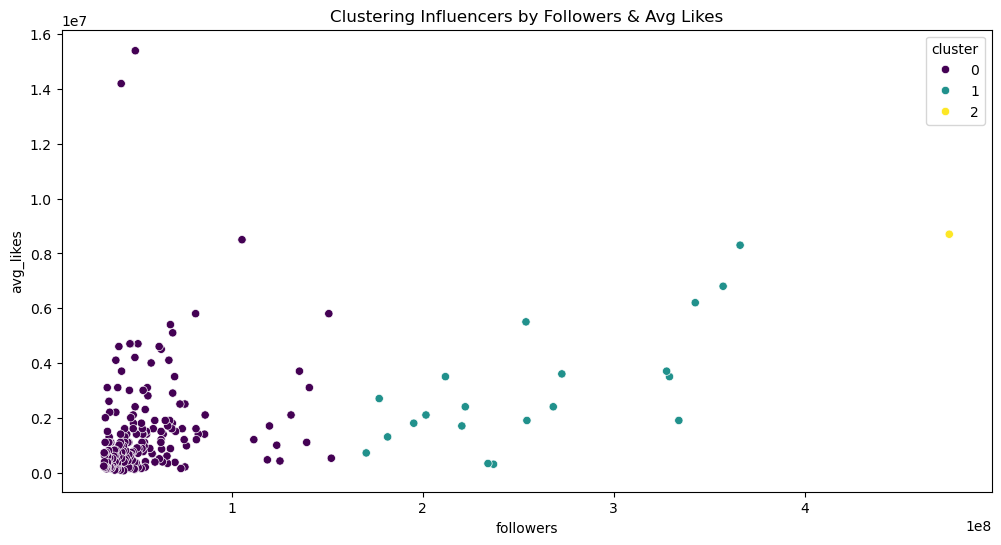

     followers  avg_likes cluster_category
0  475800000.0  8700000.0            Niche
1  366200000.0  8300000.0           Rising
2  357300000.0  6800000.0           Rising
3  342700000.0  6200000.0           Rising
4  334100000.0  1900000.0           Rising
5  329200000.0  3500000.0           Rising
6  327700000.0  3700000.0           Rising
7  272800000.0  3600000.0           Rising
8  268300000.0  2400000.0           Rising
9  254500000.0  1900000.0           Rising


In [549]:
X_cluster = df[['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'engagement_ratio', 'growth_rate']]
X_cluster = X_cluster.fillna(X_cluster.mean())  # Impute NaN with column mean

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['followers'], y=df['avg_likes'], hue=df['cluster'], palette='viridis')
plt.title("Clustering Influencers by Followers & Avg Likes")
plt.show()

# Assigning cluster names
df['cluster_category'] = df['cluster'].map({0: "High-profile", 1: "Rising", 2: "Niche"})
print(df[['followers', 'avg_likes', 'cluster_category']].head(10))

### Step 7: Feature Importance

We analyze the importance of each feature in predicting the influence score.

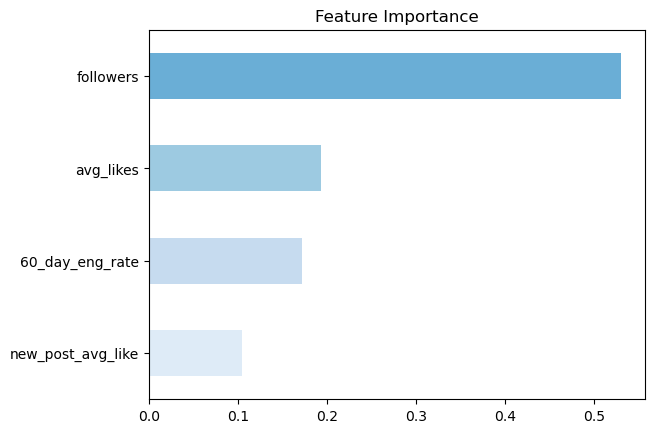

In [552]:
# Display Feature Importances from the Model
blue_palette = sns.color_palette("Blues", len(feature_importances))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title='Feature Importance', color= blue_palette)
plt.show()

### Step 8: True vs Predicted Influence Score

We visualize the true vs predicted influence scores to evaluate the model's performance.

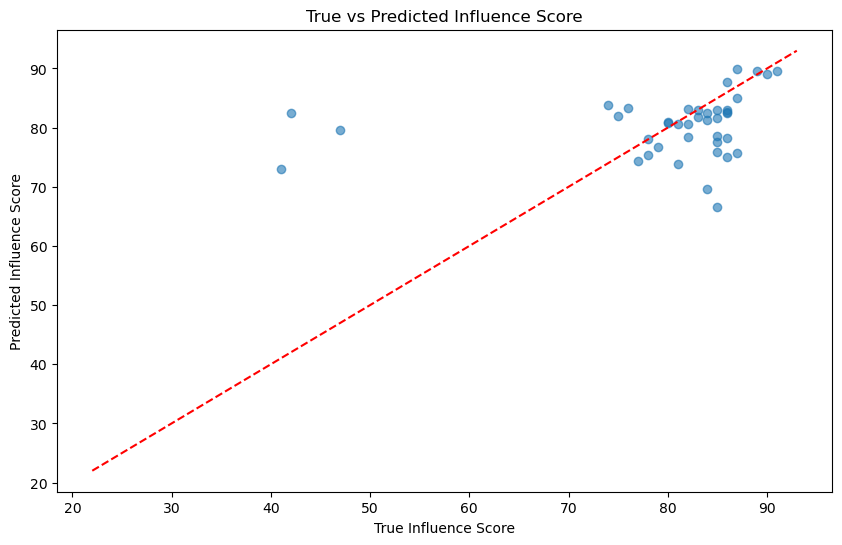

In [555]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.show()

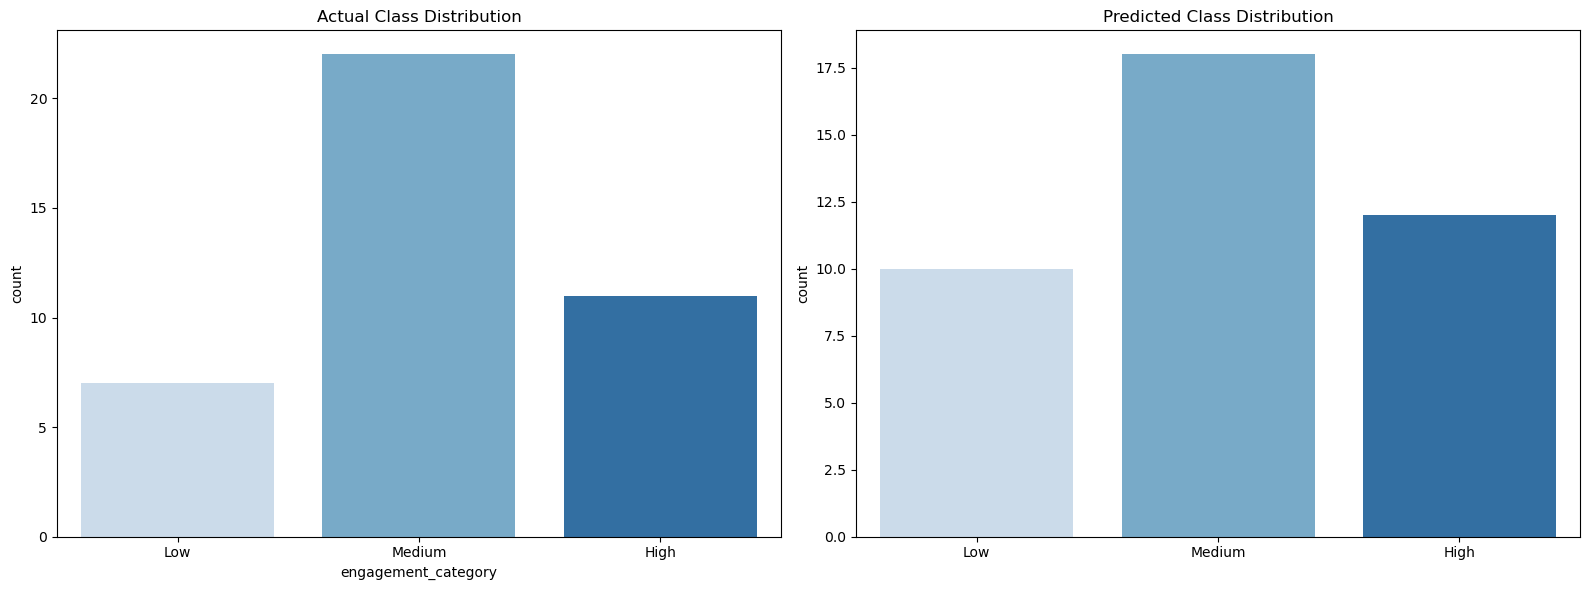

In [567]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Actual distribution
sns.countplot(x=y_test_clf, order=['Low', 'Medium', 'High'], ax=ax[0], hue= y_test_clf, palette="Blues")
ax[0].set_title("Actual Class Distribution")

# Predicted distribution
sns.countplot(x=y_pred_clf, order=['Low', 'Medium', 'High'], ax=ax[1], hue= y_pred_clf, palette="Blues")
ax[1].set_title("Predicted Class Distribution")

plt.tight_layout()
plt.show()

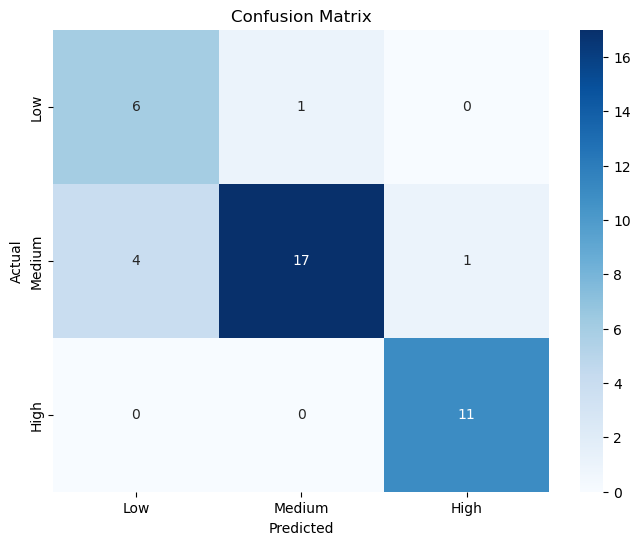

In [559]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test_clf, y_pred_clf, labels=['Low', 'Medium', 'High']),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Low', 'Medium', 'High'],
    yticklabels=['Low', 'Medium', 'High']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Insights for Businesses

The following summarizes the main insights obtained from the Instagram Influencer Engagement Prediction analysis. It includes key trends, engagement factors, and recommendations for improving influencer marketing strategies.

#### 1. Engagement vs. Followers

- Influencers with moderate followers (mid-tier) tend to have a higher engagement rate than mega influencers.
- High follower count does not guarantee high engagement, indicating some influencers may have inactive or fake followers.
#### 2. Country-Specific Engagement Trends

- Russia (20.45%), UAE (15.39%), and Czech Republic (14.43%) have the highest average engagement rates.
- Brazil, Turkey, and Germany also show strong audience interaction, making them ideal markets for localized influencer campaigns.
#### 3. Posting Frequency and Engagement

- A negative correlation (-0.195) exists between new post average likes and the 60-day engagement rate, meaning frequent posting may lower overall engagement.
A balanced posting strategy is essential for maintaining audience interest.
#### 4. Clustering Insights: Influencer Categories

Influencers were grouped into three distinct categories based on followers, likes, and engagement:

- High-profile influencers – Large follower base but lower engagement.
- Rising influencers – Moderate followers with strong engagement, making them ideal for brand partnerships.
- Niche influencers – Smaller following but highly engaged audiences, often leading to higher conversion rates.

#### 5. Machine Learning Model Performance

- The classification model achieved 90% accuracy in predicting engagement categories (Low, Medium, High).
- The regression model had a low R² score (0.015), indicating engagement prediction can be improved with additional data features.


## Trends and Anomalies in Influencer Marketing

1. Mid-tier and niche influencers deliver higher ROI than mega influencers.
2. Localized influencer marketing in high-engagement regions improves campaign performance.
3. Strategic posting schedules help sustain engagement over time.
4. Fake followers are a concern—businesses should analyze engagement metrics before selecting influencers.

## Recommendations for Optimizing Influencer Marketing

#### 1. Selecting the Right Influencers
- Prioritize engagement rate over follower count.
- Mid-tier and niche influencers provide higher audience interaction and conversions.
- Use data-driven selection instead of vanity metrics like total followers.
#### 2. Expanding into High-Engagement Markets
- Target high-engagement regions like Russia, UAE, Brazil, and Germany.
- Adapt marketing strategies based on local audience behaviors for better conversions.
#### 3. Improving Influencer Campaigns
- Work with influencers who post strategically, rather than excessively.
- Encourage quality content over high-frequency posting for sustained engagement.
#### 4. Identifying Fake Engagement
- Analyze engagement-to-followers ratio before partnerships to detect potential fake followers.
- Avoid influencers with high followers but low engagement, as they may have fake or inactive audiences.

## Conclusion

This project provides valuable insights into Instagram influencer engagement trends, helping brands identify the most effective influencers for marketing campaigns. The findings indicate that mid-tier and niche influencers offer better engagement than mega influencers, and regional marketing strategies can improve campaign success. Refining predictive models and focusing on engagement-driven influencer selection will enhance the effectiveness of influencer marketing strategies.